Olá! Vamos iniciar mais um projeto de análise de dados!

Dessa vez temos conosco um dataset interessantíssimo fornecido pela Olist, nele contamos com mais de 100 mil informações sobre os pedidos feitos entre 2016 e 2018 em diversas lojas virtuais do Brasil, as informações vão desde geolocalização, status dos pedidos, até às avaliações feitas pelos clientes.

Segundo a própria Olist todas as informações que constam em nosso dataset são reais, sendo mantido apenas em anonimato a identidade dos clientes, como forma de preservação. Ainda segundo a empresa outras referências foram substituídas pelos nomes das casas referentes à série Game of Thrones. 

Antes de começarmos as nossas análises propriamente, convém nos atentarmos ao fornecedor de nossos dados:

* "Em termos gerais, Olist é uma plataforma que conecta a sua loja virtual ao seu público na internet. Funciona como um facilitador de processos, uma conexão segura entre lojistas e consumidores. Olist é um grande descomplicador para qualquer lojista – online ou offline – que deseja vender nos principais marketplaces do Brasil."


In [55]:
import pandas_profiling 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import os


np.random.seed(789)
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
sns.set_style("dark")

In [64]:
customer = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

Comecemos por observar os clientes. 

In [3]:
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Até então, aparentemente não há nenhum dado faltante. 

Cabe tirar a dúvida se alguns clientes compraram mais de uma vez, para isso convém observarmos a incidência de valores repetidos no costumer_unique_id, pois ali temos o registro "pessoal" e único dos clientes, logo, se houver mais de uma incidência, houve uma nova compra pelo mesmo cliente.

Mas antes de darmos esse passo, vamos dar uma olhada nos dados gerais das compras conforme as regiões.


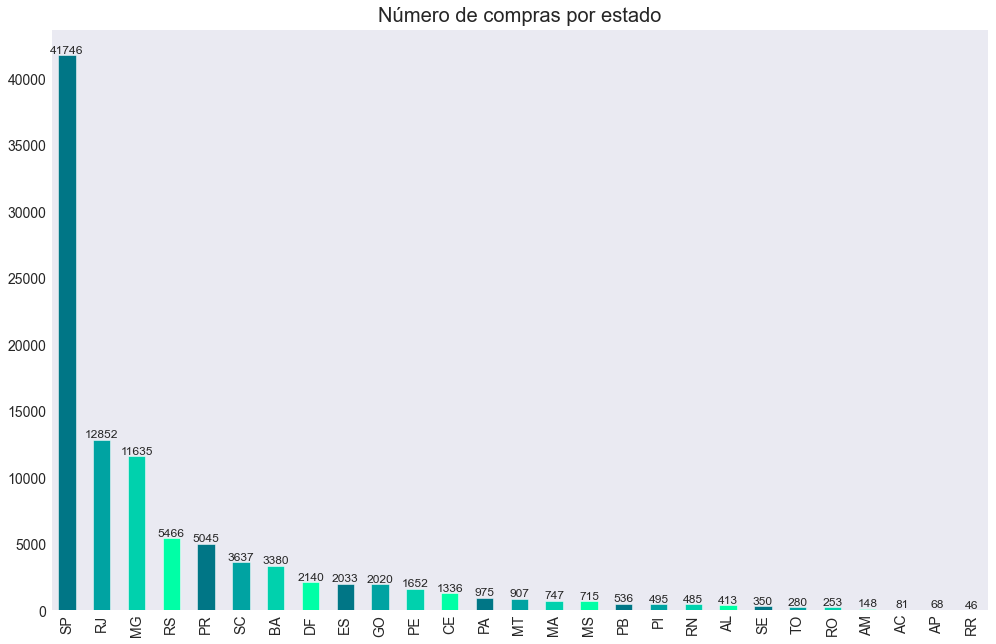

In [52]:
#Voltando à base de dados geral, observemos as incidências de compras por estado.

compras_0 = customer['customer_state'].value_counts().plot(kind='bar', figsize = (15,10), color =['#007686', '#00a3a2', '#00d1ad', '#00ffa6'])

for x in compras_0.containers:
    compras_0.bar_label(x, label_type='edge', fontsize = 12)


plt.title('Número de compras por estado')
plt.show()

In [53]:
## Vamos ver quantos usuários fizeram mais de uma compra

customer['customer_unique_id'].duplicated().value_counts()

## Temos mais de três mil resultados duplicados...


False    96096
True      3345
Name: customer_unique_id, dtype: int64

In [41]:
repetidos = customer[customer['customer_unique_id'].duplicated()==True].value_counts()

In [8]:
repetidos_1 = repetidos.groupby(['customer_unique_id']).value_counts()
repetidos_1.sort_values(ascending=False).head()


customer_unique_id                 
8d50f5eadf50201ccdcedfb9e2ac8455  1    16
3e43e6105506432c953e165fb2acf44c  1     8
1b6c7548a2a1f9037c1fd3ddfed95f33  1     6
6469f99c1f9dfae7733b25662e7f1782  1     6
ca77025e7201e3b30c44b472ff346268  1     6
dtype: int64

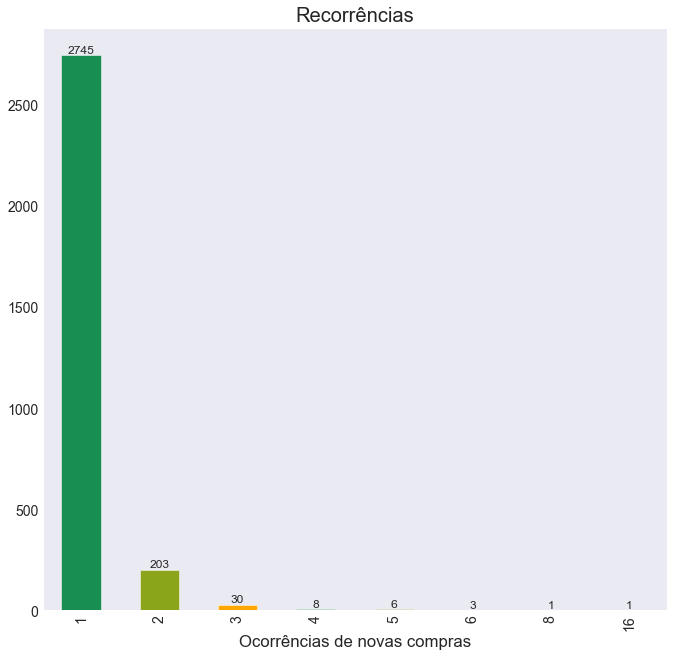

In [24]:
## Para uma melhor visualização, observemos o gráfico:

compras_1= repetidos_1.value_counts().plot(kind='bar', figsize = (10,10), color = ['#198e52', '#8ba51a', '#ffa600'])

for x in compras_1.containers:
    compras_1.bar_label(x, label_type='edge', fontsize = 12)

plt.title('Recorrências')
plt.xlabel('Ocorrências de novas compras')

plt.show()

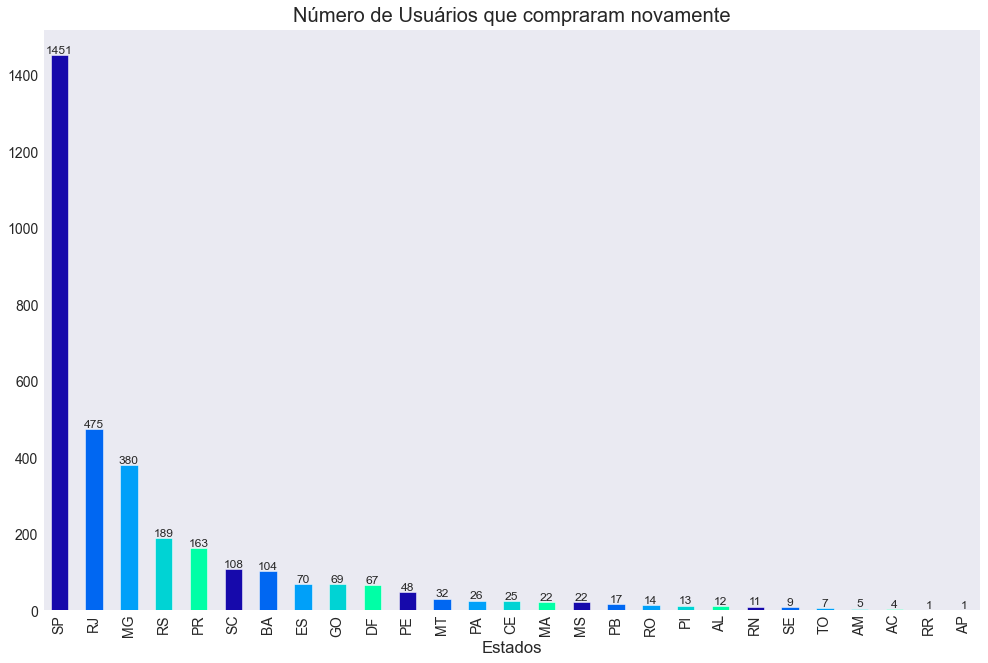

In [54]:
rpt = customer[customer['customer_unique_id'].duplicated()==True]

compras_2 = rpt['customer_state'].value_counts().plot(kind='bar', figsize = (15,10), 

color =['#1609ab',
'#0067f2',
'#00a0f9',
'#00d3d4',
'#00ffa6'])



for x in compras_2.containers:
    compras_2.bar_label(x, label_type='edge', fontsize = 12)


plt.title('Número de Usuários que compraram novamente')
plt.xlabel('Estados')
plt.show()

Já temos em consideração o número de compras em geral e quantas dessas compras foram feitas mais de uma vez por um mesmo consumidor.

Ademais já conseguimos visualizar melhor a incidência de compras por estado. Mas alguns mapas ficariam melhores para a nossa visualização, não?

In [101]:
geo = geolocation ##Encurtando o nome do dataset
import folium
from folium import plugins
from folium.plugins import FastMarkerCluster


In [103]:
#Apenas os dados longitudinais e latitudinais.

coordenadas = geo.loc[:,['geolocation_lat', 'geolocation_lng']]

In [107]:
mp = folium.Map(location=[-21.764089543486026, -48.167850377601376], tiles='CartoDB dark_matter', zoom_start=4.3)
mp.add_child(plugins.FastMarkerCluster(coordenadas))

mp.save('mp.html')

In [105]:
mp1 = folium.Map(location=[-21.764089543486026, -48.167850377601376], tiles='CartoDB dark_matter', zoom_start=4.3)
mp1.add_child(plugins.HeatMap(coordenadas, radius=10))

mp1
mp1.save("save_file.html")